In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
def BC_PE(r,Z,gamma,delta0,delta1,delta2,delta3,List):
    """A function representing Buckingham-Coulomb potential 
    which comprises three parts of energy, namely, 
    Born-Mayer(BM) potential; polarization and coulomb potential.
    r is the radius
    Z is the number of electrons excluding the outer shell electron
    gamma and delta are constants in BM potential"""
    
    if List=="H_list":
        PE_total=-1/r
        return PE_total
    else:
        # Born-Mayer potential
        BM_PE=-Z*(1/r+delta0+delta1*r+delta2*r*r+delta3*r*r*r)*np.exp(-gamma*r)
        
        # polarization
        beta_r=4.790960043258*r 
        # the product of beta and r
        chi=1-(1+beta_r+beta_r*beta_r/2)*np.exp(-beta_r) 
        # cut off function "chi"
        polarization=-0.9448*(chi)**2/(2*r**4)
    
        # the coulomb potential 
        coulomb_PE=-1/r
    
        PE_total=BM_PE+polarization+coulomb_PE
        return PE_total

# One electron atom

In [3]:
# components of the list: Z,gamma,delta0,delta1,delta2,delta3
H_list=[0,0,0,0,0,0]
Na_list=[10,3.032459521675,-0.1648757105954,0.5254039623026,0.03225926765253,0.05746004991888]

In [4]:
def effective_PE(r,n,l,QD,List):
    """This function is the effective_potential part of the differential equation 
    which can be solved to obtain the radial wave equation for a hydrogen atom 
    r is the radius
    n is the principle quantum number
    l is the orbital angular momentum quantum number
    QD is the quantum defect
    List contains information about the atom,
    terms in the "List" corresponding to Z,gamma,delta0,delta1,delta2,delta3"""
    
    if r==0: 
        return 0
    # when radius is 0, the probability wavefunction is 0.
    else: 
        centrifugal_PE=-l*(l+1)/(r*r) 
        # potential energy due to the centrifugal force
        orbital_energy=-1/((n-QD)*(n-QD))
        #energy of the energy level
        BC_potential=BC_PE(r,List[0],List[1],List[2],List[3],List[4],List[5],List) 
        #BC potential 
        return centrifugal_PE-2*BC_potential+orbital_energy

        

In [5]:
def SBS_method(fun,N,h,n,l,QD,List):
    """Step by step method can find the result of second order differential equation
    fun is the potential function of an atom
    N is the total number of the points
    h is the interval between two neibouring points
    n is the principle quantum number
    l is the orbital angular momentum quantum number
    QD is the quantum defect"""
    TOTAL_X= N*h #the furtherest distance between the electron and the nuclear
    x = np.linspace(0,TOTAL_X,N+1) # each radial point on the x direction
    retval = np.zeros((N+1)) 
    eff_PE= np.zeros((N+1))
    retval[0] = 0 # boundary condition: when r=0, the probability of the electron is 0.
    retval[1] = 0.1 # boundary condition
    r=0 # start with radius is equal to 0
    for i in range(1,N):
        r+= h
        eff_PE[i]=fun(r,n,l,QD,List) # find the potential part of the radial wavefunction
    for j in range(1,N):
        retval[j+1]=((2-10*h*h*eff_PE[j]/12)*retval[j]- (1+h*h*eff_PE[j-1]/12)*retval[j-1])/( 1+h*h*eff_PE[j+1]/12)
    return x,retval

In [6]:
def REV_SBS_method(fun,N,h,n,l,QD,List):
    """Step by step method can find the result of second order differential equation
    fun is the potential function of an atom
    N is the total number of the points
    h is the interval between two neibouring points
    n is the principle quantum number
    l is the orbital angular momentum quantum number
    QD is the quantum defect
    R is a large value where the wavefunction terminates"""
    TOTAL_X= N*h #the furtherest distance between the electron and the nuclear
    x = np.linspace(TOTAL_X,0,N+1) # each radial point on the x direction
    retval = np.zeros((N+1)) 
    eff_PE = np.zeros((N+1))
    retval[0] = 0 # boundary condition: when r=0, the probability of the electron is 0.
    retval[1] = 0.1 # boundary condition
    r=TOTAL_X # start with radius is equal to R
    for i in range(1,N):
        r-= h
        eff_PE[i]=fun(r,n,l,QD,List) # find the potential part of the radial wavefunction
    for j in range(1,N):
        retval[j+1]=((2-10*h*h*eff_PE[j]/12)*retval[j]- (1+h*h*eff_PE[j-1]/12)*retval[j-1])/( 1+h*h*eff_PE[j+1]/12)
    return x,retval

In [7]:
def plot(x,y,title,n,l):
    """Plot the wavefunction"""
    plt.plot(x,y, label="P{0:.0f},{1:.0f}" .format(n, l))
    # the plot that contains a label which has two variables.
    #they are n principal quantum number, l orbital angular momentum number
    plt.xlabel('radius r/a0')
    plt.ylabel('wavefunction Pnl')
    plt.title(title)
    plt.grid()

In [8]:
def NM_radial_wavefunction(fun,N,h,n,l,QD,List,show_plot):
    """The normallised radial wavefunction of atoms and plot the graph
    fun is the potential function of an atom
    N is the total number of points
    h is the interval between two neibouring points
    n is the principal quantum number
    l is the orbital angular momentum quantum number
    QD is the quantum defect
    R is a large value where the wavefunction terminates """
    #apply boundary condition to wavefunction by using step by step method 
    wave=SBS_method(fun,N,h,n,l,QD,List)
    wave2=REV_SBS_method(fun,N,h,n,l,QD,List) #reversed step by step method
    
    #normallised first derivative of both functions
    diff_wave = (np.roll(wave[1],-1) - np.roll(wave[1],1))/(2*h) # first derivative of the wave function
    NM_diff_wave=diff_wave[1:N]/wave[1][1:N] # Normallise the first derivative of the wave function to get rid of the constant

    REV_wave2=(wave2[1][::-1]) # reversed wave function 2
    REV_diff_wave2 = (np.roll(REV_wave2,-1) - np.roll(REV_wave2,1))/(2*h)# reversed first derivative of the wave function 2
    REV_NM_diff_wave2=REV_diff_wave2[1:N]/REV_wave2[1:N] # normallised and reversed first derivative of the wave function
    
    #Find the continuity for the first derivative of both wavefunction
    continuity=NM_diff_wave-REV_NM_diff_wave2 # the first term has division by 0, so it is excluded in calculation
    
    # the minimum value after subtraction is the first order derivative continuous point
    mini_value=np.min(abs(continuity))
    intersection=np.where(abs(continuity)==mini_value)

    if len(intersection)>0 and len(intersection[0])>0:
        POI=intersection[0][0] #point of intersection

    wave3=np.concatenate([wave[1][0:POI+1],REV_wave2[POI+1:N+1]])# two parts are continuous in shape
    # we have found that the intersection point is when N=19+1=20, because the first term of the 'continuity' array was removed.
    
    #make two parts of the wavefunctions continuous
    constant1=wave[1][POI]/REV_wave2[POI]
    REV_wave2_constant1=REV_wave2*constant1
    UN_Pnl=np.concatenate([wave[1][0:POI+1],REV_wave2_constant1[POI+1:N+1]])# unnormallised wavefunction
    
    #normallising the wavefunction after combining two continuous parts
    UN_Pnl_square=UN_Pnl*UN_Pnl
    constant2_squared=integrate.simps(UN_Pnl_square,wave[0])
    constant2=np.sqrt(constant2_squared)
    Pnl=UN_Pnl/constant2
    if show_plot==True:
        plot(wave[0],Pnl,'Normalised radial wavefunction of a sodium atom',n,l)
        return Pnl
    if show_plot==False:
        return Pnl

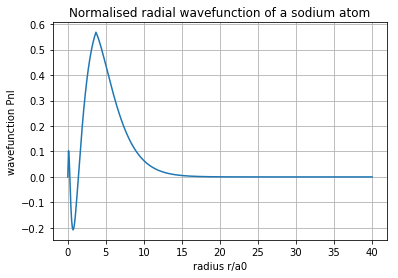

In [9]:
r=NM_radial_wavefunction(effective_PE,400,0.1,3,0,1.4,Na_list,True)

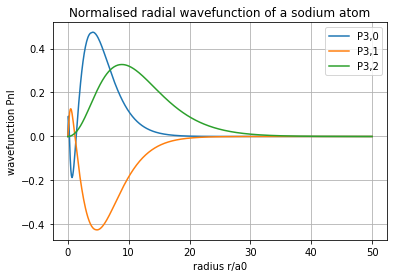

In [10]:
QD_Na=1.2,0.883,0.01
# quantum defect of a sodium atom in 3s,p,d orbitals
for i in range (0,3):
    NM_radial_wavefunction(effective_PE,500,0.1,3,i,QD_Na[i],Na_list,True)
plt.legend()

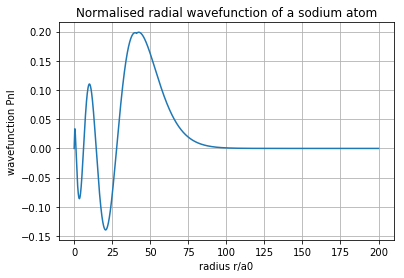

In [11]:
a=NM_radial_wavefunction(effective_PE,2000,0.1,6,1,0.8,Na_list,True)


# Unperturbed oscillator strength

In [12]:
def numerical_integral(fun,N,h,n,l,QD,n_prime,l_prime,QD_prime,List,show_plot):
    """This is a function which integrate "PrP_prime" from origin to 
    infinity to obtain a numerial result, where "PrP" stands for the 
    product of two radial wavefunctions and position operator r  
    fun is the potential function of an atom
    N is the total number of the points
    h is the interval between two neibouring points
    n is the principle quantum number in the initial level
    l is the orbital angular momentum quantum number in the initial level
    QD is the quantum defect in the initial level
    n_prime is the principle quantum number in the transited level
    l_prime is the orbital angular momentum quantum number in the transited level
    QD_prime is the quantum defect in the transited level
    R is a large value where the wavefunction terminates """
    wave=SBS_method(fun,N,h,n,l,QD,List) 
    #wave[0] provides the x axis for the later integration use
    
    RW=NM_radial_wavefunction(fun,N,h,n,l,QD,List,show_plot)
    # the radial wavefunction of the electron in the initial level
    RW_prime=NM_radial_wavefunction(fun,N,h,n_prime,l_prime,QD_prime,List,show_plot)  
    # the radial wavefunction of the electron in the transited level
    matrix_element=RW*wave[0]*RW_prime 
    # the product of two radial wavefunctions and r
    integral=integrate.simps(matrix_element,wave[0]) 
    # the integration from origin to positive infinity of PrP_prime

    return integral

In [13]:
def Energy_diff(n,QD,n_prime,QD_prime):
    """This function finds the energy shift between two levels 
    where an electron has transfered """
    Energy=-1/(2*(n-QD)*(n-QD)) 
    # energy of the electron at the initial level 
    Energy_prime=-1/(2*(n_prime-QD_prime)*(n_prime-QD_prime)) 
    # energy of the electron at the transited level 
    return Energy_prime-Energy
def Cl_prime(l,l_prime):
    """A constant which has orbital angular momentum quantum number dependency 
    in the function "Oscillator_strength" """
    max_val=np.max([l,l_prime]) 
    # find the larger value between the orbital angular momentum quantum numbers 
    # which are before and after transition
    return max_val/(2*l+1)

In [14]:
def oscillator_strength(fun,N,h,n,l,QD,n_prime,l_prime,QD_prime,List):
    """This is a funciton which find the oscillator strength of a hydrogen atom 
    while the strong transition occurs
    N is the total number of points
    h is the interval between two neighbouring points
    n is the principal quantum number in the initial level
    l is the orbital angular momentum quantum number in the initial level
    QD is the quantum defect in the initial level
    n_prime is the principal quantum number in the transited level
    l_prime is the orbital angular momentum quantum number in the transited level
    QD_prime is the quantum defect in the transited level
    R is a large value where the wave function terminates """
    integral_squared=numerical_integral(fun,N,h,n,l,QD,n_prime,l_prime,QD_prime,List,False)**2
    strength=(2/3)*Energy_diff(n,QD,n_prime,QD_prime)*Cl_prime(l,l_prime)*integral_squared 
    # Oscillator strength is a measure of frequency
    return strength

In [15]:
os_H=oscillator_strength(effective_PE,5000,0.1,1,0,0,3,1,-1,"H_list")
print(os_H)

0.0290529156319


In [16]:
QD_Na1=[0.883,0.867,0.862,0.859]
os_Na1=np.zeros((4)) 
for i in range (0,4):
    os_Na1[i]=oscillator_strength(effective_PE,2000,0.1,3,0,1.373,i+3,1,QD_Na1[i],Na_list)
print(os_Na1)

[  1.10341973e+00   8.17010479e-03   6.35043609e-04   9.39870416e-05]


In [17]:
oscillator_strength(effective_PE,2000,0.1,3,1,0.886,4,0,1.4,Na_list)

0.091099649769362273

# oscillator strength in a weak magnetic field

In [18]:
def CG_coefficient_j(j,mj,j_prime,mj_prime,mu):
    """Clebsch-Gordan coefficients for j quantum numbers"""
    if j_prime==j:
        if mu==0:
            sqrt_term00=np.sqrt((mj**2)/((j+1)*j))
            return sqrt_term00
        elif mu==-1:
            M1=mj+1
            sqrt_term01=-np.sqrt((j+M1)*(j-M1+1)/(2*j*(2*j+1)))
            return sqrt_term01        
        else:
            M2=mj-1
            sqrt_term02= np.sqrt((j-M2)*(j+M2+1)/(2*j*(j+1)))
            return sqrt_term02
    elif j_prime==j+1:
        if mu==0:
            sqrt_term10= np.sqrt((j-mj+1)*(j+mj+1)/((2*j+1)*(j+1)))
            return sqrt_term10
        elif mu==-1:
            M3=mj+1
            sqrt_term11= np.sqrt((j+M3)*(j+M3+1)/((2*j+1)*(2*j+2)))
            return sqrt_term11
        else:
            M4=mj-1
            sqrt_term12= np.sqrt((j-M4)*(j-M4+1)/((2*j+1)*(2*j+2)))
            return sqrt_term12
    else:
        if mu==0:
            sqrt_term20=-np.sqrt((j-mj)*(j+mj)/((2*j+1)*(j)))
            return sqrt_term20
        elif mu==-1:
            M5=mj+1
            sqrt_term21= np.sqrt((j-M5)*(j-M5+1)/(2*j*(2*j+1)))
            return sqrt_term21        
        else:
            M6=mj-1
            sqrt_term22= np.sqrt((j+M6+1)*(j+M6)/(2*j*(2*j+1)))
            return sqrt_term22
    
    

In [19]:
def os_magnetic(fun,N,h,List,data,B):
    """The second version of oscillator strength in a weak magnetic field
    in terms of transition dipole moment.
    The spin part of the wave function is assumed to be negligible, thus L=J.
    data=n,l,ml,QD,n_prime,l_prime,ml_prime,QD_prime"""
    
    #total angular momentum j=l+s=l+0
    j=data[1]
    #j=l+0
    j_prime=data[5]
    #j_prime=l_prime+0
    mj=data[2]
    #mj=ml+0
    mj_prime=data[-2]
    #mj_prime=ml_prime+0
    mu=mj-mj_prime
    # difference between mj' and mj
    
    cg_squared=(CG_coefficient_j(j,mj,j_prime,mj_prime,mu))**2
    #vc_coefficient(l,m,l_prime,m_prime,mu)
    vc_squared=cg_squared/(2*data[-3]+1)
    
    integral_squared=numerical_integral(fun,N,h,data[0],data[1],data[3],data[4],data[5],data[7],List,False)**2
    # numerical_integral(fun,N,h,n,l,QD,n_prime,l_prime,QD_prime,False)
    
    mu_e=(9.27400949/4.35974417)*10**(-6)
    energy_coefficient=Energy_diff(data[0],data[3],data[4],data[-1])+mu_e*B*mu
    
    max_val=(2*data[1]+1)*Cl_prime(data[1],data[5])
    perturbed_os=(2/3)*max_val*energy_coefficient*integral_squared*vc_squared 
    # Cl_prime(l,l_prime)=Cl_prime(data[1],data[5])
    # Oscillator strength is a measure of frequency
    return perturbed_os

In [20]:
transition_data_mag1=3,1,1,0,1,0,0,0
os_magnetic(effective_PE,2000,0.1,"H_list",transition_data_mag1,1)

-0.026423860414578761

In [21]:
transition_data_mag=[]
n=2
while n<9:
    transition_data_mag.append([n,1,-1,0,1,0,0,0])
    n=n+1
print(transition_data_mag)
        #osm[i-2,j]=os_magnetic(effective_PE,2000,0.1,"H_list",transition_data_mag[i,j],1)

[[2, 1, -1, 0, 1, 0, 0, 0], [3, 1, -1, 0, 1, 0, 0, 0], [4, 1, -1, 0, 1, 0, 0, 0], [5, 1, -1, 0, 1, 0, 0, 0], [6, 1, -1, 0, 1, 0, 0, 0], [7, 1, -1, 0, 1, 0, 0, 0], [8, 1, -1, 0, 1, 0, 0, 0]]


In [22]:
#transition_data_mag=n,l,m,QD,n_prime,l_prime,m_prime,QD_prime
#transition_data_mag=[[5,1,1,0,3,0,0,0],[4,1,1,0,3,0,0,0]]
b=np.zeros((7))
for i in range (0,7):
    #a=os_magnetic_1(effective_PE,2000,0.1,transition_data_mag,1)
    b[i]=os_magnetic(effective_PE,2000,0.1,"H_list",transition_data_mag[i],1)
print(b)

[-0.13904224 -0.02642411 -0.00968435 -0.004656   -0.00260535 -0.00160805
 -0.00106374]


In [23]:
#transition_data_mag=n,l,m,QD,n_prime,l_prime,m_prime,QD_prime
transition_data_mag2=4,1,1,0.867,3,0,0,1.2    
#a=os_magnetic_1(effective_PE,2000,0.1,transition_data_mag,1)
b=os_magnetic(effective_PE,2000,0.1,Na_list,transition_data_mag2,1)
print(b)

-0.00464216270528


# oscillator strength in Spin-orbit coupling

In [24]:
def energy_spin_orbit(fun,N,h,List,data):
    """Spin-orbit energy for hydrogen atom only
    data=n,l,j,mj,QD,n_prime,l_prime,j_prime,m_j_prime,QD_prime"""
    
    TOTAL_X= N*h #the furtherest distance between the electron and the nuclear
    x = np.linspace(0,TOTAL_X,N+1) # each radial point on the x direction
    v= np.zeros((N+1))
    r=0 # start with radius is equal to 0
    for i in range(1,N):
        r+= h
        v[i]=1/r # find the potential part of the radial wavefunction

    derivative_v=(np.roll(v,-1) - np.roll(v,1))/(2*h)
    
    radial_wf_initial=NM_radial_wavefunction(fun,N,h,data[0],data[1],data[4],List,False)
    radial_wf_final=NM_radial_wavefunction(fun,N,h,data[-5],data[-4],data[-1],List,False)
    #NM_radial_wavefunction(fun,N,h,n,l,QD,False)
    
    initial_integrand=v*derivative_v*(radial_wf_initial**2)
    final_integrand=v*derivative_v*(radial_wf_final**2)
    
    integral_initial=integrate.simps(initial_integrand,x)
    integral_final=integrate.simps(final_integrand,x)
    
    constant=(1/4)*((1/137)**2)
    quantum_num=data[2]*(data[2]+1)-data[1]*(data[1]+1)-3/4
    quantum_num_prime=data[-3]*(data[-3]+1)-data[-4]*(data[-4]+1)-3/4 
    
    if data[1] ==0:
        energy=0
        energy_prime=constant*quantum_num_prime*integral_final
        return energy_prime-energy
    
    if data[6]==0:
        energy_prime=0
        energy=constant*quantum_num*integral_initial
        return energy_prime-energy
    else:
        energy=constant*quantum_num*integral_initial
        energy_prime=constant*quantum_num_prime*integral_final
        return energy_prime-energy

In [25]:
def six_j_symbol(l,l_prime,j,j_prime):
    s=1/2
    if l_prime==l+1:
        if j_prime==j:
            k=s+j+l+1
            numerator1=2*(k+1)*(k-2*s)*(k-2*j)*(k-2*(l+1)+1)
            denominator1=2*j*(2*j+1)*(2*j+2)*(2*(l+1)-1)*2*(l+1)*(2*(l+1)+1)
            return ((-1)**(k+1))*(numerator1/denominator1)**0.5
        elif j_prime==j+1:
            k=s+j+l+2
            numerator2=k*(k+1)*(k-2*s-1)*(k-2*s)
            denominator2=(2*(j+1)-1)*2*(j+1)*(2*(j+1)+1)*(2*(l+1)-1)*2*(l+1)*(2*(l+1)+1)
            return ((-1)**(k+1))*(numerator2/denominator2)**0.5
        else:
            k=s+j+l
            numerator3=(k-2*(j-1)-1)*(k-2*(j-1))*(k-2*(l+1)+1)*(k-2*(l+1)+2)
            denominator3=(2*(j-1)+1)*(2*(j-1)+2)*(2*(j-1)+3)*(2*(l+1)-1)*2*(l+1)*(2*(l+1)+1)
            return ((-1)**(k+1))*(numerator3/denominator3)**0.5
    else:
        if j_prime==j:
            k=s+j+l
            numerator4=2*(k+1)*(k-2*s)*(k-2*j)*(k-2*l+1)
            denominator4=2*j*(2*j+1)*(2*j+2)*(2*l-1)*2*l*(2*l+1)
            return ((-1)**(k+1))*(numerator4/denominator4)**0.5
        elif j_prime==j-1:
            k=s+j+l
            numerator5=k*(k+1)*(k-2*s-1)*(k-2*s)
            denominator5=(2*j-1)*2*j*(2*j+1)*(2*l-1)*2*l*(2*l+1)
            return ((-1)**(k+1))*(numerator5/denominator5)**0.5
        else:
            k=s+j+l
            numerator6=(k-2*(j-1)-1)*(k-2*(j-1))*(k-2*l+1)*(k-2*l+2)
            denominator6=(2*j+1)*(2*j+2)*(2*j+3)*(2*l-1)*2*(l+1)*(2*l+1)
            return ((-1)**(k+1))*(numerator6/denominator6)**0.5            

In [55]:
def os_spin_orbit(fun,N,h,List,data):
    """Corrected oscillator strength with the perturbation of 
    Spin-orbit coupling
    data=n,l,j,mj,QD,n_prime,l_prime,j_prime,m_j_prime,QD_prime"""

    mu=data[3]-data[-2]
    # difference between mj and mj'
    cg=CG_coefficient_j(data[2],data[3],data[-3],data[-2],mu)
    #CG_coefficient_j(j,mj,j_prime,mj_prime,mu)
    vc_squared=cg**2/(2*data[-3]+1)
    # j' dependent
    vc=vc_squared**0.5
    six_j=six_j_symbol(data[1],data[6],data[2],data[-3])
    #six_j_symbol(l,l_prime,j,j_prime)
    S=((-1)**(data[3]+data[-3]+data[-4]))*six_j*(vc)
    #S=((-1)**(mj+j_prime+l_prime))*vc*six_j
    
    
    integral_squared=numerical_integral(fun,N,h,data[0],data[1],data[4],data[5],data[6],data[-1],List,False)**2
    # numerical_integral(fun,N,h,n,l,QD,n_prime,l_prime,QD_prime,False)
   
    energy=Energy_diff(data[0],data[4],data[-5],data[-1])+energy_spin_orbit(fun,N,h,List,data)
    
    max_val=np.max([data[1],data[6]])
    #max_val=np.max([l,l_prime])
    perturbed_os=(2/3)*energy*integral_squared*vc_squared*max_val*(abs(S)**2)*(2*data[2]+1)*(2*data[-3]+1)
    
    return perturbed_os

In [56]:
#transition_data_so=n,l,j,mj,QD,n_prime,l_prime,j_prime,m_j_prime,QD_prime
transition_data_so=1,0,0.5,-0.5,0,2,1,1.5,0.5,0
os_spin_orbit(effective_PE,2000,0.1,"H_list",transition_data_so)

0.0038622569443237001